# Chapter 5, Activity 6: Working with adult income dataset (UCI)

In this acitvity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Load necessary libraries

In [1]:
import numpy as np
import pandas as  pd
import matplotlib
import matplotlib.pyplot as plt

### Read in the adult income data set (given as a .csv file) from the local directory and check first 5 records

In [2]:

df = pd.read_csv("adult_income_data-1.csv")
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


### Do you think the column names (headers) make sense?

In [3]:
df.columns   ## Some of them not.7

Index(['39', ' State-gov', '77516', ' Bachelors', '13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' Male', '2174', '0', '40',
       ' United-States', ' <=50K'],
      dtype='object')

### Time to read in the text file with data descriptions and extract header names
Write a file reading script which reads the text file line by line, and extracts the first phrase which is the header name

In [4]:
HeaderNames = []  
with open ('adult_income_names-1.txt','r') as f:
        for line in f:
            f.readline()
            var = line.split(":")[0]
            HeaderNames.append(var)
HeaderNames

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

### Add a name ("_Income_") for the response variable (last column) to the dataset and read it again with the column names supplied 

In [5]:
HeaderNames.append('_Income_')

In [6]:
df = pd.read_csv("adult_income_data-1.csv", names=HeaderNames)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,_Income_
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Show a statistical summary of the data set. Did you notice only a small number of columns are included?

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Many variables in the dataset have multiple factors or classes. Can you write a loop to count and print them?

In [8]:
vars_class = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

In [9]:
for v in vars_class:
    classes = df[v].unique()
    num_classes = df[v].nunique()
    print("There are {} classes in the \"{}\" column. They are : {}".format(num_classes,v,classes))
    print("-"*100)
    

There are 9 classes in the "workclass" column. They are : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education" column. They are : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status" column. They are : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation" column. They are : [' Adm-clerical' ' 

### Is there any missing (NULL) data in the dataset? Write a single line of code to show this for all coumns

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
_Income_          0
dtype: int64

### Practice subsetting: Create a DataFrame with only 
* age, 
* education,
* occupation


In [11]:
dfCreate = df[['age', 'education', 'occupation']]
dfCreate

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


### Show the histogram of age with bin size = 20

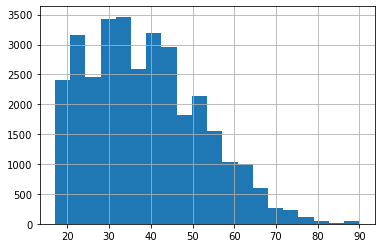

In [12]:
dfCreate['age'].hist(bins=20)

### Show boxplots of _age_ grouped by _education_ (Use a long figure size 15x6 and make _x_ ticks font size 15 )

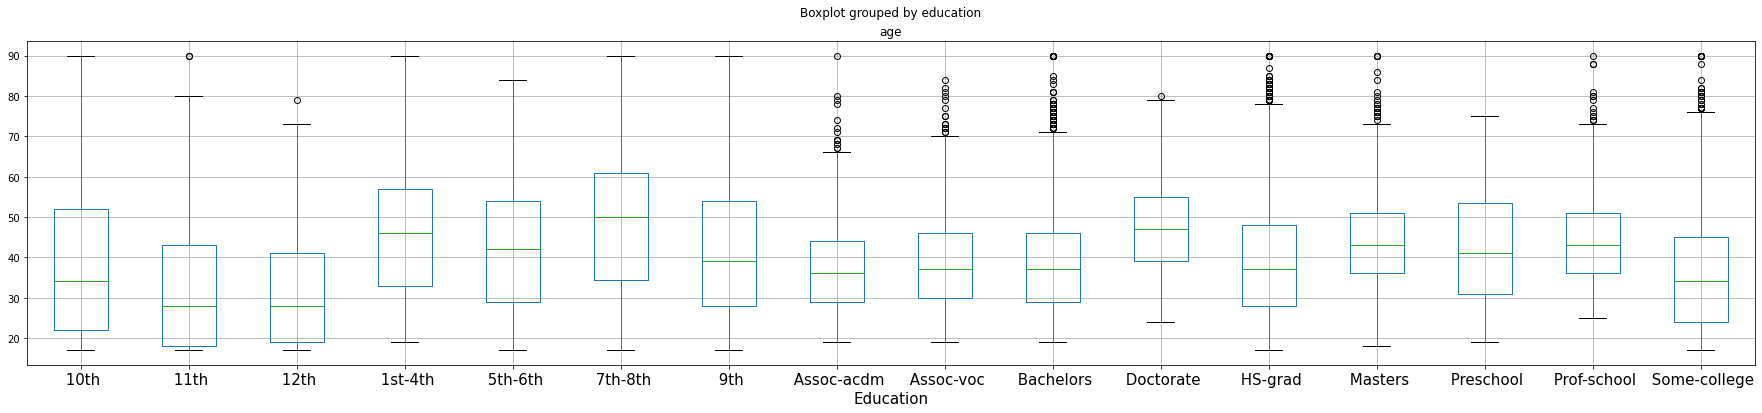

In [13]:
dfCreate.boxplot(column = 'age', by = 'education',figsize = (30,6)) ## 15,6 so small and looks not good.that why I wanna do 30
plt.xticks(fontsize = 15)
plt.xlabel("Education", fontsize=15)
plt.show()

### Before doing further operation, we need to use the skill with 'apply' method we learned in this lesson. <br><br> But why? - Turns out that during reading the dataset from the CSV file, all the strings came with a whitespace character in front. So, we need to remove that whitespace from all the strings. 

### Let's write a small function to strip the whitespace character

In [14]:
def strip_whitespace(s):
    return s.strip()

### Use the 'apply' method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

#### This is the preferred method so that you don't accidentally delete valuable data. Most of the time, create a new column with a desired operation and then copy it back to the old column if necessary.

#### IGNORE any warning messages printed.

In [15]:
# Education column
dfCreate['education_stripped'] = df['education'].apply(strip_whitespace)
dfCreate['education'] = dfCreate['education_stripped']
dfCreate.drop(labels = ['education_stripped'],axis=1, inplace=True)

# Occupation column
dfCreate['occupation_stripped'] = df['occupation'].apply(strip_whitespace)
dfCreate['occupation'] = dfCreate['occupation_stripped']
dfCreate.drop(labels = ['occupation_stripped'],axis=1, inplace=True)


<ipython-input-15-8b00ef8b03f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCreate['education_stripped'] = df['education'].apply(strip_whitespace)
<ipython-input-15-8b00ef8b03f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCreate['education'] = dfCreate['education_stripped']
C:\Users\ozgur\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

### Answer the following question using conditional filtering/boolean indexing: <br><br> _"How many people of age between 30 and 50 (inclusive) are represented in this dataset?"_

In [16]:
# Write a code with conditional clauses and join them by & (AND) to filter the dataframe
df_filtered = dfCreate [(dfCreate['age']>=30) & (dfCreate['age']<=50)]
df_filtered.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [17]:
# We can look at the shape of the filtered dataframe and take the 1st element at 0 index of the tuple
df2 = df_filtered.shape[0]
df2

16390

In [42]:
# Print out the number of people between 30 and 50 (The back of the book is slightly differnt, but use as a guide)
df_filtered  # 16390 rows so mean 16390 people.

print("Number of people between 30 and 50:", df2)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
...,...,...,...
32550,43,Some-college,Craft-repair
32551,32,10th,Handlers-cleaners
32552,43,Assoc-voc,Sales
32553,32,Masters,Tech-support


### Practice "GroupBy": Group by occupation and education to show how the mean age is distributed

In [57]:
occupationMean = dfCreate.groupby('occupation').mean()['age']
educationMean  = dfCreate.groupby('education').mean()['age']
print("OccupationMean:", occupationMean, "EducationMean :", educationMean)



OccupationMean: occupation
?                    40.882800
Adm-clerical         36.964456
Armed-Forces         30.222222
Craft-repair         39.031471
Exec-managerial      42.169208
Farming-fishing      41.211268
Handlers-cleaners    32.165693
Machine-op-inspct    37.715285
Other-service        34.949621
Priv-house-serv      41.724832
Prof-specialty       40.517633
Protective-serv      38.953775
Sales                37.353973
Tech-support         37.022629
Transport-moving     40.197871
Name: age, dtype: float64 EducationMean : education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64


### Group by occupation and show the summary statistics of age. Try to answer the following questions,
* Which profession has oldest workers on the average?
* Which profession has its largest share of workforce above 75th percentile?

In [61]:
dfCreate.groupby('occupation').describe()['age']
##  Exec-manageria, 
##  Unknown (?)

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


### Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis

Actually, just by looking at the table above, you should be able to see that **'Armed-Forces'** group has only 9 count i.e. 9 data points. But how to detect it. Plot the count column in a bar chart.

Note, how the first argument to the barh function is the index of the dataframe which is the summary stats of the occupation groups. We see that 'Armed-Forces' group has almost no data.

#### This exercise teaches you that sometimes, outlier is not just a value but can be a whole group. The data of this group is fine but it is too small to be useful for any analysis. So it can be treated as an outlier in this case. 

#### But always use your business knowledge and engineering judgement for such outlier detection and how to process them.

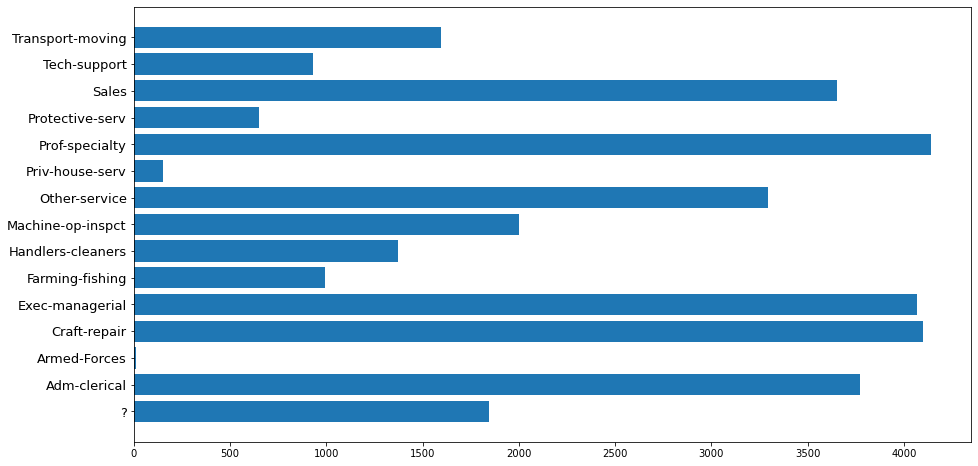

In [64]:
occupation_stats=dfCreate.groupby('occupation').describe()['age']
plt.figure (figsize = (15,8))
plt.barh(y = occupation_stats.index, width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

### Practice Merging by common keys: Suppose you are given two datasets where the common key is `occupation`. Can you merge them? 

#### First create two such disjoint datasets by taking random samples from the full dataset and then try merging. Include at least 2 other columns along with the common key column for each dataset.

#### Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if your common key is not unique? Why is it so?

In [65]:
# Sample first dataframe with 5 elements and your chosen random_state  (Reference Back of book)
df1 = df[['age','workclass','occupation']].sample(5,random_state = 101 )
df1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [67]:
# Sample second dataframe with 5 elements and your chosen random_state  (Reference Back of book)
df2 = df[['education','occupation']].sample(5,random_state = 101 )
df2.head()

,education,occupation
22357,HS-grad,Machine-op-inspct
26009,11th,Sales
20734,HS-grad,Exec-managerial
17695,10th,Handlers-cleaners
27908,7th-8th,Craft-repair


In [70]:
# Merge the dataframes  (Reference Back of book)
df_merged = pd.merge (df1,df2, on  = 'occupation', how = 'inner').drop_duplicates()

In [71]:
df_merged

,age,workclass,occupation,education
0,51,Private,Machine-op-inspct,HS-grad
1,19,Private,Sales,11th
2,40,Private,Exec-managerial,HS-grad
3,17,Private,Handlers-cleaners,10th
4,61,Private,Craft-repair,7th-8th
